In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_rows', 1000)
df = pd.read_excel('CleanedData.xlsx')

In [4]:
df.head()
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'CompanyName', 'hourly', 'employer_provided', 'min_salary',
       'max_salary', 'avg_salary', 'State', 'agecompany', 'python', 'R',
       'Excel', 'Senior'],
      dtype='object')

In [5]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,employer_provided,min_salary,max_salary,avg_salary,State,agecompany,python,R,Excel,Senior
0,Data Scientist,$111K-$143K\n(Glassdoor est.),Responsibilities:\nBring Creativity to Data pr...,3.8,BlackLine\n3.8,"Woodland Hills, CA","Woodland Hills, CA",501 to 1000 employees,2001,Company - Public,...,0,111,143,127.0,CA,19,1,0,0,0
1,Data Analyst,$50K-$63K\n(Glassdoor est.),"Description\nInterpret data, analyze results u...",4.2,Gensco\n4.2,"Tacoma, WA","Tacoma, WA",501 to 1000 employees,1948,Company - Private,...,0,50,63,56.5,WA,72,0,0,1,0
2,Data Analyst,$41K-$78K\n(Glassdoor est.),Undertone stands alone among AdTech and ad net...,3.8,Undertone\n3.8,"New York, NY","New York, NY",201 to 500 employees,2001,Subsidiary or Business Segment,...,0,41,78,59.5,NY,19,0,0,0,0
3,Research Scientist,$42K-$92K\n(Glassdoor est.),Job Details\nJob Title\nResearch Scientist\n\n...,3.9,The Ohio State University Wexner Medical Cente...,"Columbus, OH","Columbus, OH",10000+ employees,1916,Hospital,...,0,42,92,67.0,OH,104,0,0,0,0
4,Data Analyst I,$24K-$48K\n(Glassdoor est.),The Data Analyst is responsible for data entry...,4.1,"Insight Enterprises, Inc.\n4.1","Plano, TX","Tempe, AZ",5001 to 10000 employees,1988,Company - Public,...,0,24,48,36.0,TX,32,0,0,1,0


In [6]:
def simpler_title(title):
    if 'data scientist' in title.lower():
        return 'Data Scientist'

    elif 'data engineer' in title.lower():
        return 'Data Engineer'

    elif 'analyst' in title.lower():
        return 'Analyst'

    elif 'research scientist' in title.lower():
        return 'Research Scientist'

    elif 'machine learning' in title.lower():
        return 'Machine Learning Engineer'

    elif 'manager' in title.lower():
        return 'Manager'

    elif 'director' in title.lower():
        return 'Director'

    else:
        return 'na'


In [7]:
def junior(title):
    if 'jr' in title.lower() or 'jr.' in title.lower():
        return '1'
    else:
        return '0'

In [8]:
df['SimpJob'] = df['Job Title'].apply(simpler_title)


In [9]:
df['SimpJob'].value_counts()

Data Scientist               318
Data Engineer                149
na                           145
Analyst                       86
Manager                       24
Machine Learning Engineer     18
Research Scientist            15
Director                      13
Name: SimpJob, dtype: int64

In [10]:
df['Junior'] = df['Job Title'].apply(junior)

In [11]:
df['Junior'].value_counts()

0    768
Name: Junior, dtype: int64

In [12]:
df['State'].value_counts()
#Los Angeles as a state: - Fixing:

 CA             177
 MA              86
 VA              76
 NY              66
 TX              41
 MD              26
 WI              26
 OH              25
 IL              24
 FL              22
 NC              20
 AZ              18
 WA              17
 CO              15
 PA              13
 MO              12
 UT              12
 MI              12
 SC              11
 MN              11
 TN              11
 DC               9
 NJ               7
 IN               5
 AL               5
 NE               3
 IA               2
 MS               2
 HI               2
 GA               2
 RI               2
 NM               2
 OR               2
 OK               1
 NH               1
 WV               1
 Los Angeles      1
Name: State, dtype: int64

In [13]:
#Los Angeles as a state: - Fixing:
df['State'] = df['State'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df['State'].value_counts()

CA    178
MA     86
VA     76
NY     66
TX     41
MD     26
WI     26
OH     25
IL     24
FL     22
NC     20
AZ     18
WA     17
CO     15
PA     13
MO     12
MI     12
UT     12
SC     11
MN     11
TN     11
DC      9
NJ      7
IN      5
AL      5
NE      3
RI      2
IA      2
HI      2
OR      2
GA      2
NM      2
MS      2
OK      1
WV      1
NH      1
Name: State, dtype: int64

In [14]:
#Number of Competitors:
df['NumberComp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != -1 else 0)

In [15]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,agecompany,python,R,Excel,Senior,NumberComp
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.752734,1872.104167,0.029948,0.002604,79.401042,126.226562,102.813802,39.950521,0.654948,0.003906,0.490885,0.248698,0.957031
std,0.707378,447.135230,0.170555,0.050998,29.538618,43.240460,35.451785,43.585133,0.475695,0.062418,0.500243,0.432540,1.346966
min,-1.000000,-1.000000,0.000000,0.000000,13.000000,24.000000,18.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.400000,1952.000000,0.000000,0.000000,58.000000,98.750000,79.875000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000,1995.000000,0.000000,0.000000,79.000000,124.000000,101.000000,22.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.200000,2007.000000,0.000000,0.000000,95.000000,151.000000,122.625000,55.250000,1.000000,0.000000,1.000000,0.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,212.000000,331.000000,271.500000,239.000000,1.000000,1.000000,1.000000,1.000000,3.000000


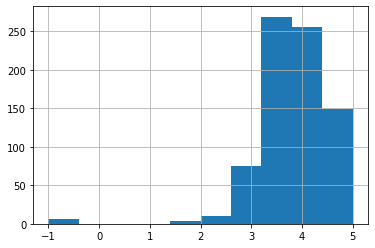

In [16]:
df['Rating'].hist()

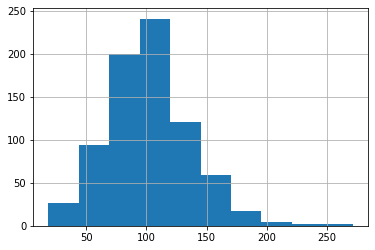

In [17]:
df['avg_salary'].hist()

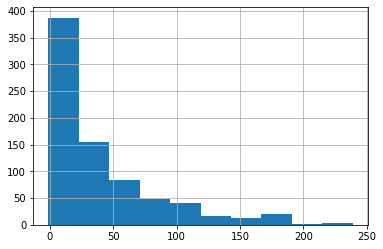

In [18]:
df['agecompany'].hist()

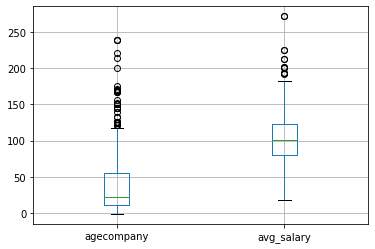

In [19]:
df.boxplot(column= ['agecompany', 'avg_salary'])

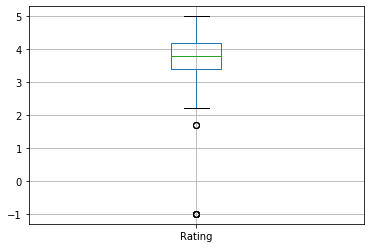

In [20]:
df.boxplot(column= ['Rating'])


In [21]:
df[['agecompany','Rating','avg_salary', 'NumberComp']].corr()

,agecompany,Rating,avg_salary,NumberComp
agecompany,1.000000,-0.095122,-0.085544,0.155020
Rating,-0.095122,1.000000,0.002568,0.020033
avg_salary,-0.085544,0.002568,1.000000,0.073605
NumberComp,0.155020,0.020033,0.073605,1.000000


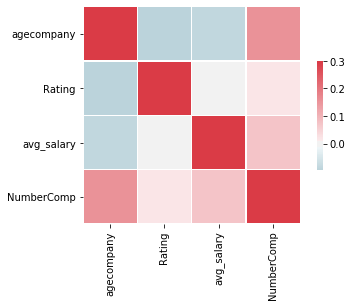

In [22]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df[['agecompany','Rating','avg_salary', 'NumberComp']].corr(), vmax=.3, center=0, cmap=cmap, square=True, linewidth=0.5, cbar_kws={'shrink':.5})
fig = heatmap.get_figure()
fig.savefig('heatmap.png')

In [23]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'CompanyName', 'hourly', 'employer_provided', 'min_salary',
       'max_salary', 'avg_salary', 'State', 'agecompany', 'python', 'R',
       'Excel', 'Senior', 'SimpJob', 'Junior', 'NumberComp'],
      dtype='object')

In [24]:

df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'State', 'CompanyName', 'python', 'R',
       'Excel','Senior', 'SimpJob', 'Junior']]

Graph for Location: Total-20
Graph for State: Total-20
Graph for CompanyName: Total-20
Graph for Sector: Total-20


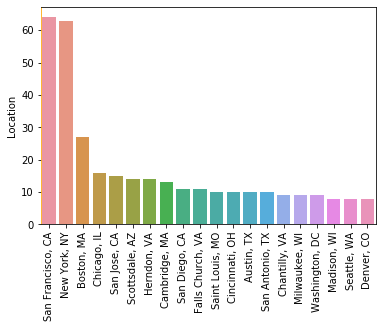

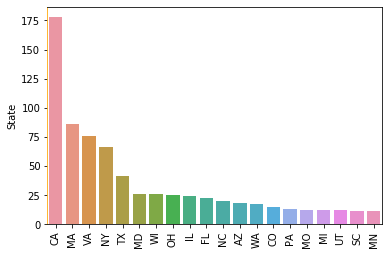

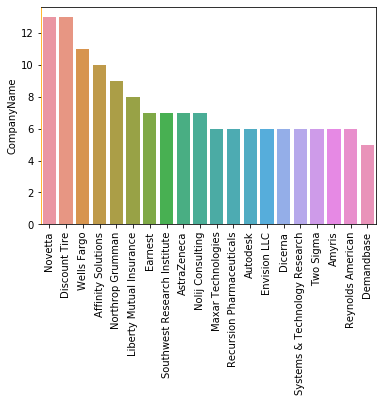

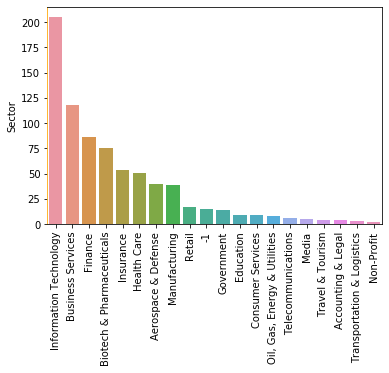

In [25]:
for i in df_cat[['Location', 'State','CompanyName', 'Sector']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('Graph for %s: Total-%d' %(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    chart.spines['left'].set_color('orange')
    plt.show()

In [26]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'CompanyName', 'hourly', 'employer_provided', 'min_salary',
       'max_salary', 'avg_salary', 'State', 'agecompany', 'python', 'R',
       'Excel', 'Senior', 'SimpJob', 'Junior', 'NumberComp'],
      dtype='object')

In [27]:
SimpJobSenior = pd.pivot_table(df, index=['SimpJob', 'Senior'], values='avg_salary')

SimpJobSenior

avg_salary
SimpJob                   Senior            
Analyst                   0        59.364407
                          1        92.444444
Data Engineer             0        99.269608
                          1       120.457447
Data Scientist            0       109.163306
                          1       139.050000
Director                  0       115.833333
                          1       118.500000
Machine Learning Engineer 0       117.357143
                          1       120.250000
Manager                   0       110.366667
                          1       110.833333
Research Scientist        0       108.800000
na                        0        81.100000
                          1       103.916667

In [28]:
pd.pivot_table(df[(df['SimpJob'] =='Data Scientist') & (df['Senior'] ==0) ], index=['State'], values = 'avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
State,
CA,129.445455
MD,127.750000
AZ,122.500000
NJ,118.750000
UT,116.833333
MA,113.040000
NY,110.283784
MN,108.000000
GA,107.000000


In [29]:
pd.pivot_table(df[df['SimpJob'] =='Analyst'], index=['State'], values = 'avg_salary').sort_values('avg_salary', ascending=False)


,avg_salary
State,
MA,105.888889
CA,92.318182
MN,74.500000
AZ,71.500000
WA,66.750000
VA,66.666667
PA,66.250000
TX,66.083333
NY,64.250000


In [30]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'CompanyName', 'hourly', 'employer_provided', 'min_salary',
       'max_salary', 'avg_salary', 'State', 'agecompany', 'python', 'R',
       'Excel', 'Senior', 'SimpJob', 'Junior', 'NumberComp'],
      dtype='object')

In [31]:
pivots = df[['Rating', 'Sector', 'Revenue', 'NumberComp', 'hourly', 'employer_provided', 'Type of ownership', 'python', 'R', 'Excel','avg_salary']]
#Rating, Sector, Revenue, NumberComp, hourly, employer_provided, python, R, Excel,
for i in pivots.columns:
    if i != 'avg_salary':
        print(i)
        print(pd.pivot_table(pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending =False))
        print('\n')
    else:
        pass

Rating
        avg_salary
Rating            
-1.0    154.500000
 4.5    116.071429
 4.1    115.319444
 5.0    115.192308
 4.7    114.875000
 3.8    112.525000
 3.0    111.083333
 2.7    108.642857
 4.2    107.629630
 4.3    107.294118
 3.6    105.710526
 4.4    105.209677
 3.4    105.183673
 2.8    103.227273
 2.2    103.000000
 2.6    102.700000
 3.9    100.741071
 2.5     97.750000
 3.7     97.609756
 4.8     95.555556
 2.9     94.583333
 4.0     94.391667
 3.2     92.395833
 3.5     90.915254
 3.3     90.615385
 3.1     90.294118
 4.6     90.100000
 2.3     87.500000
 1.7     84.000000
 4.9     74.666667
 2.4     71.000000


Sector
                                    avg_salary
Sector                                        
Aerospace & Defense                 122.900000
Consumer Services                   122.388889
Education                           118.166667
Information Technology              116.073171
Media                               115.900000
Biotech & Pharmaceuticals   